In [1]:
import json
import io
import folium
import matplotlib
import matplotlib.pyplot as plt
import osmnx as ox 
import numpy as np
from PIL import Image

In [2]:
with open('./data/matched-results-1500.json', 'r') as f:
    match_results = json.load(f)
print(len(match_results))

match_results = [r for r in match_results if r['MATCHED_RESULTS'].get('Matched_path')]
print(len(match_results))

1500
1087


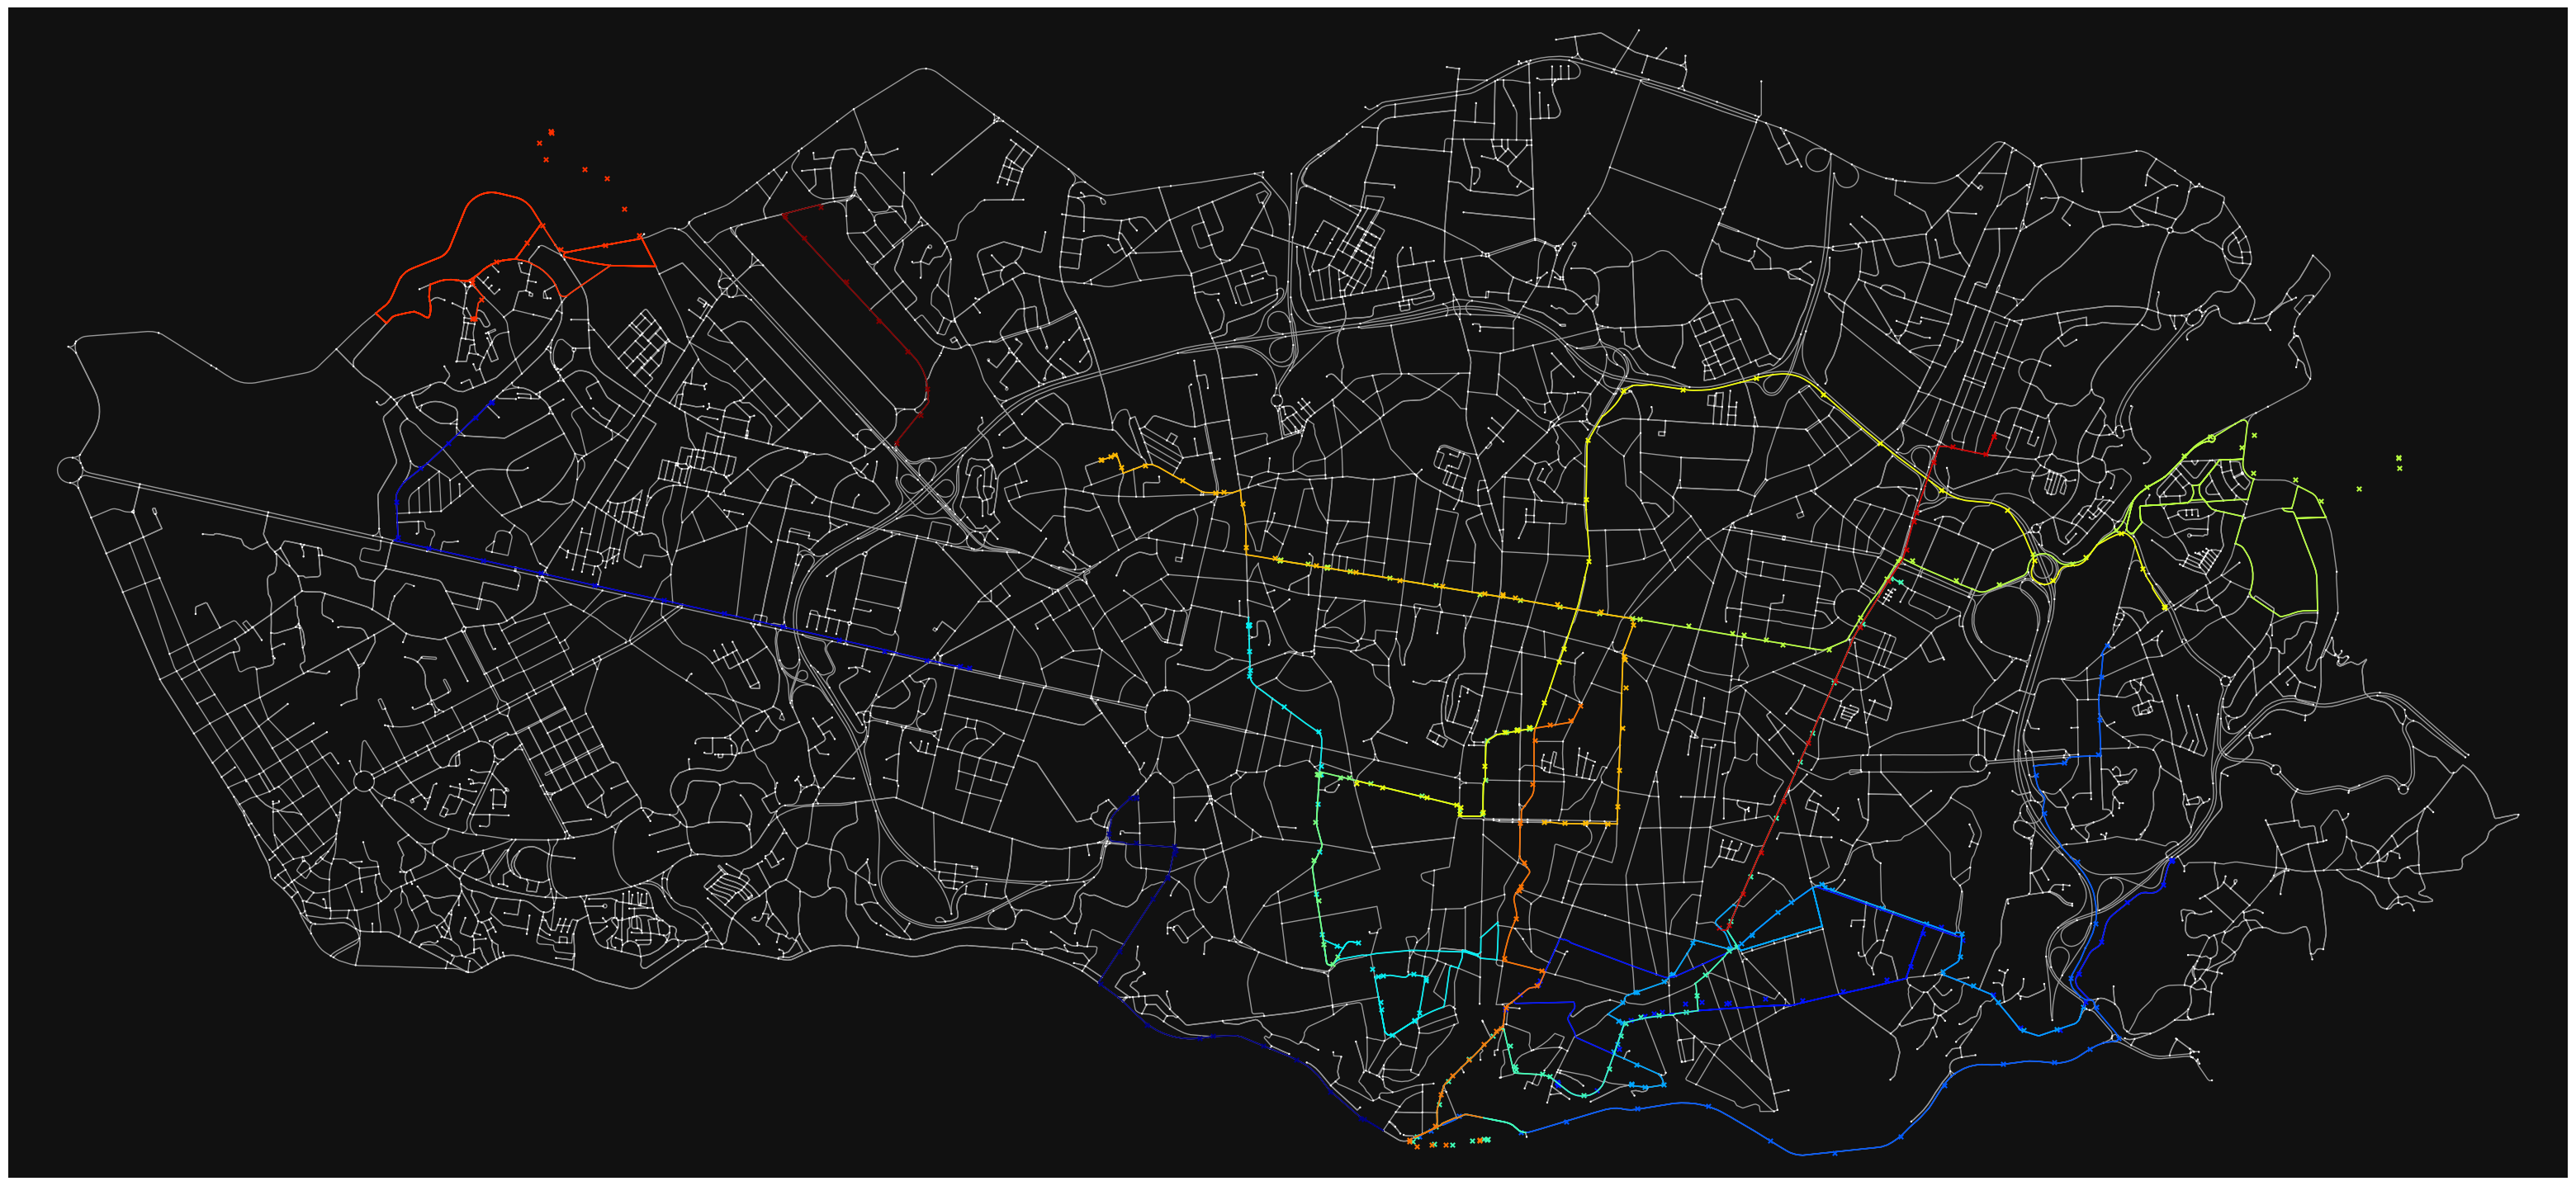

In [3]:
G = ox.io.load_graphml(filepath="./data/map/porto.graphml")
fig, ax = ox.plot_graph(G, node_size=3, figsize=(40, 40), edge_linewidth=1, show=False)

colors = plt.cm.jet(np.linspace(0, 1, 15))  
for i in range(15):
    gps_points = match_results[i]['POLYLINE']

    mgeom = match_results[i]['MATCHED_RESULTS']['Matched_geometry']
    ax.plot([i[0] for i in mgeom], [i[1] for i in mgeom], color=colors[i][:-1], linewidth=1.25)
    
    x, y = zip(*gps_points)
    ax.scatter(x, y, color=colors[i][:-1], marker='x', s=15)

fig.savefig('./data/matched-15-routes-osmnx.png', dpi=320)
plt.show()

In [4]:
initial_location = [41.1579, -8.6291]  # Example coordinates for Porto, Portugal
fmap = folium.Map(location=initial_location, zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(fmap)

colors = plt.cm.jet(np.linspace(0, 1, 15))
for i in range(15):
    gps_points = match_results[i]['POLYLINE']

    matched_geometry = match_results[i]['MATCHED_RESULTS']['Matched_geometry']
    mgeom = [i[::-1] for i in matched_geometry] 

    hex_color = matplotlib.colors.to_hex(colors[i])
    
    folium.PolyLine(mgeom, color=hex_color, weight=3).add_to(fmap)
    
    for point in gps_points:
        folium.CircleMarker(location=point[::-1], radius=2, color=hex_color).add_to(fmap)

fmap.save('./data/matched-15-routes-folium.html')

img_data = fmap._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('./data/matched-15-routes-folium.png')

fmap

In [5]:
for i in range(15):
    gps_points = match_results[i]['POLYLINE']
    matched_geometry = match_results[i]['MATCHED_RESULTS']['Matched_geometry']
    mgeom = [i[::-1] for i in matched_geometry] 

    longitudes, latitudes = zip(*gps_points)
    centroid = [np.mean(longitudes), np.mean(latitudes)]

    fmap = folium.Map(location=centroid[::-1], zoom_start=14)
    folium.TileLayer('cartodbpositron').add_to(fmap)

    hex_color = matplotlib.colors.to_hex(colors[i])

    folium.PolyLine(mgeom, color=hex_color, weight=3).add_to(fmap)

    for point in gps_points:
        folium.CircleMarker(location=point[::-1], radius=2, color=hex_color).add_to(fmap)

    # Save each map as an HTML file
    fmap.save(f'./data/matched-route-{i}-folium.html')

    img_data = fmap._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    img.save(f'./data/matched-route-{i}-folium.png')
